Sequence to Sequence Modeling(HMM)

In [8]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt 
import seaborn as sns

Example 1

In [9]:
states = ["Sunny","Rainy","Mist"]
observation = ["Dry", "Wet"]
n_states, n_observation = len(states), len(states)

In [12]:
model = hmm.CategoricalHMM(
    n_components=n_states, 
    startprob_prior = np.array([0.36,0.20,0.54]),
    transmat_prior = np.array([[0.2,0.4,0.4],[0.2,0.6,0.0],[0.1,0.4,0.5]]),
    emissionprob_prior = np.array([[0.2,0.2,0.6],[0.1,0.2,0.7],[0.1,0.2,0.7]])
) 

In [15]:
seq = np.array([0,1,0,2,1,2,0,1,1,0,2,0,1,1,2,0]).reshape(-1,1)

In [16]:
model.fit(seq)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'emissionprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'e'
Model is not converging.  Current: -12.97570175087381 is not greater than -12.725681443095453. Delta is -0.2500203077783567


CategoricalHMM(emissionprob_prior=array([[0.2, 0.2, 0.6],
       [0.1, 0.2, 0.7],
       [0.1, 0.2, 0.7]]),
               n_components=3, n_features=np.int64(3),
               random_state=RandomState(MT19937) at 0x72D258950A40,
               startprob_prior=array([0.36, 0.2 , 0.54]),
               transmat_prior=array([[0.2, 0.4, 0.4],
       [0.2, 0.6, 0. ],
       [0.1, 0.4, 0.5]]))

In [30]:
seq.flatten(),(hiddenStates := model.predict(seq))

(array([0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0]),
 array([2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]))

In [23]:
log_prob, viterbi_hmm = model.decode(seq)

In [28]:
log_prob


-13.04241292666586

In [29]:
viterbi_hmm

array([2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

/tmp/ipykernel_27160/3400898162.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


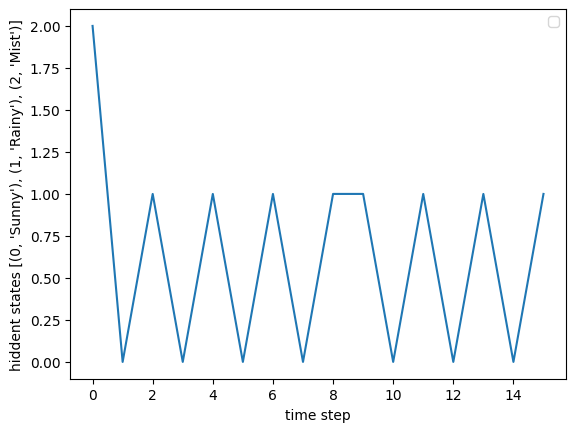

In [38]:
plt.plot(hiddenStates)
plt.xlabel("time step")
plt.ylabel(f"hiddent states {[(a,i) for a,i in enumerate(states)]}")
plt.legend()

 Example 2 - Speech Recognizing